In [ ]:
! cp /content/drive/MyDrive/PriceHand/backup.zip ./

In [ ]:
! unzip -q ./backup.zip

replace backup/65.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace backup/88.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace backup/88.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
from pathlib import Path

In [ ]:
glob = Path("backup").glob("*jpg")

In [ ]:
paths = list(glob)

In [ ]:
paths = sorted(paths, key=lambda a: int(a.stem))

In [ ]:
paths[-1]

PosixPath('backup/2461.jpg')

In [ ]:
len(paths)

2461

In [ ]:
paths[0]

PosixPath('backup/1.jpg')

In [ ]:
! cp backup/1.jpg ./1.jpg

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
# cv2.imshow('asd', '1.jpg')

In [ ]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

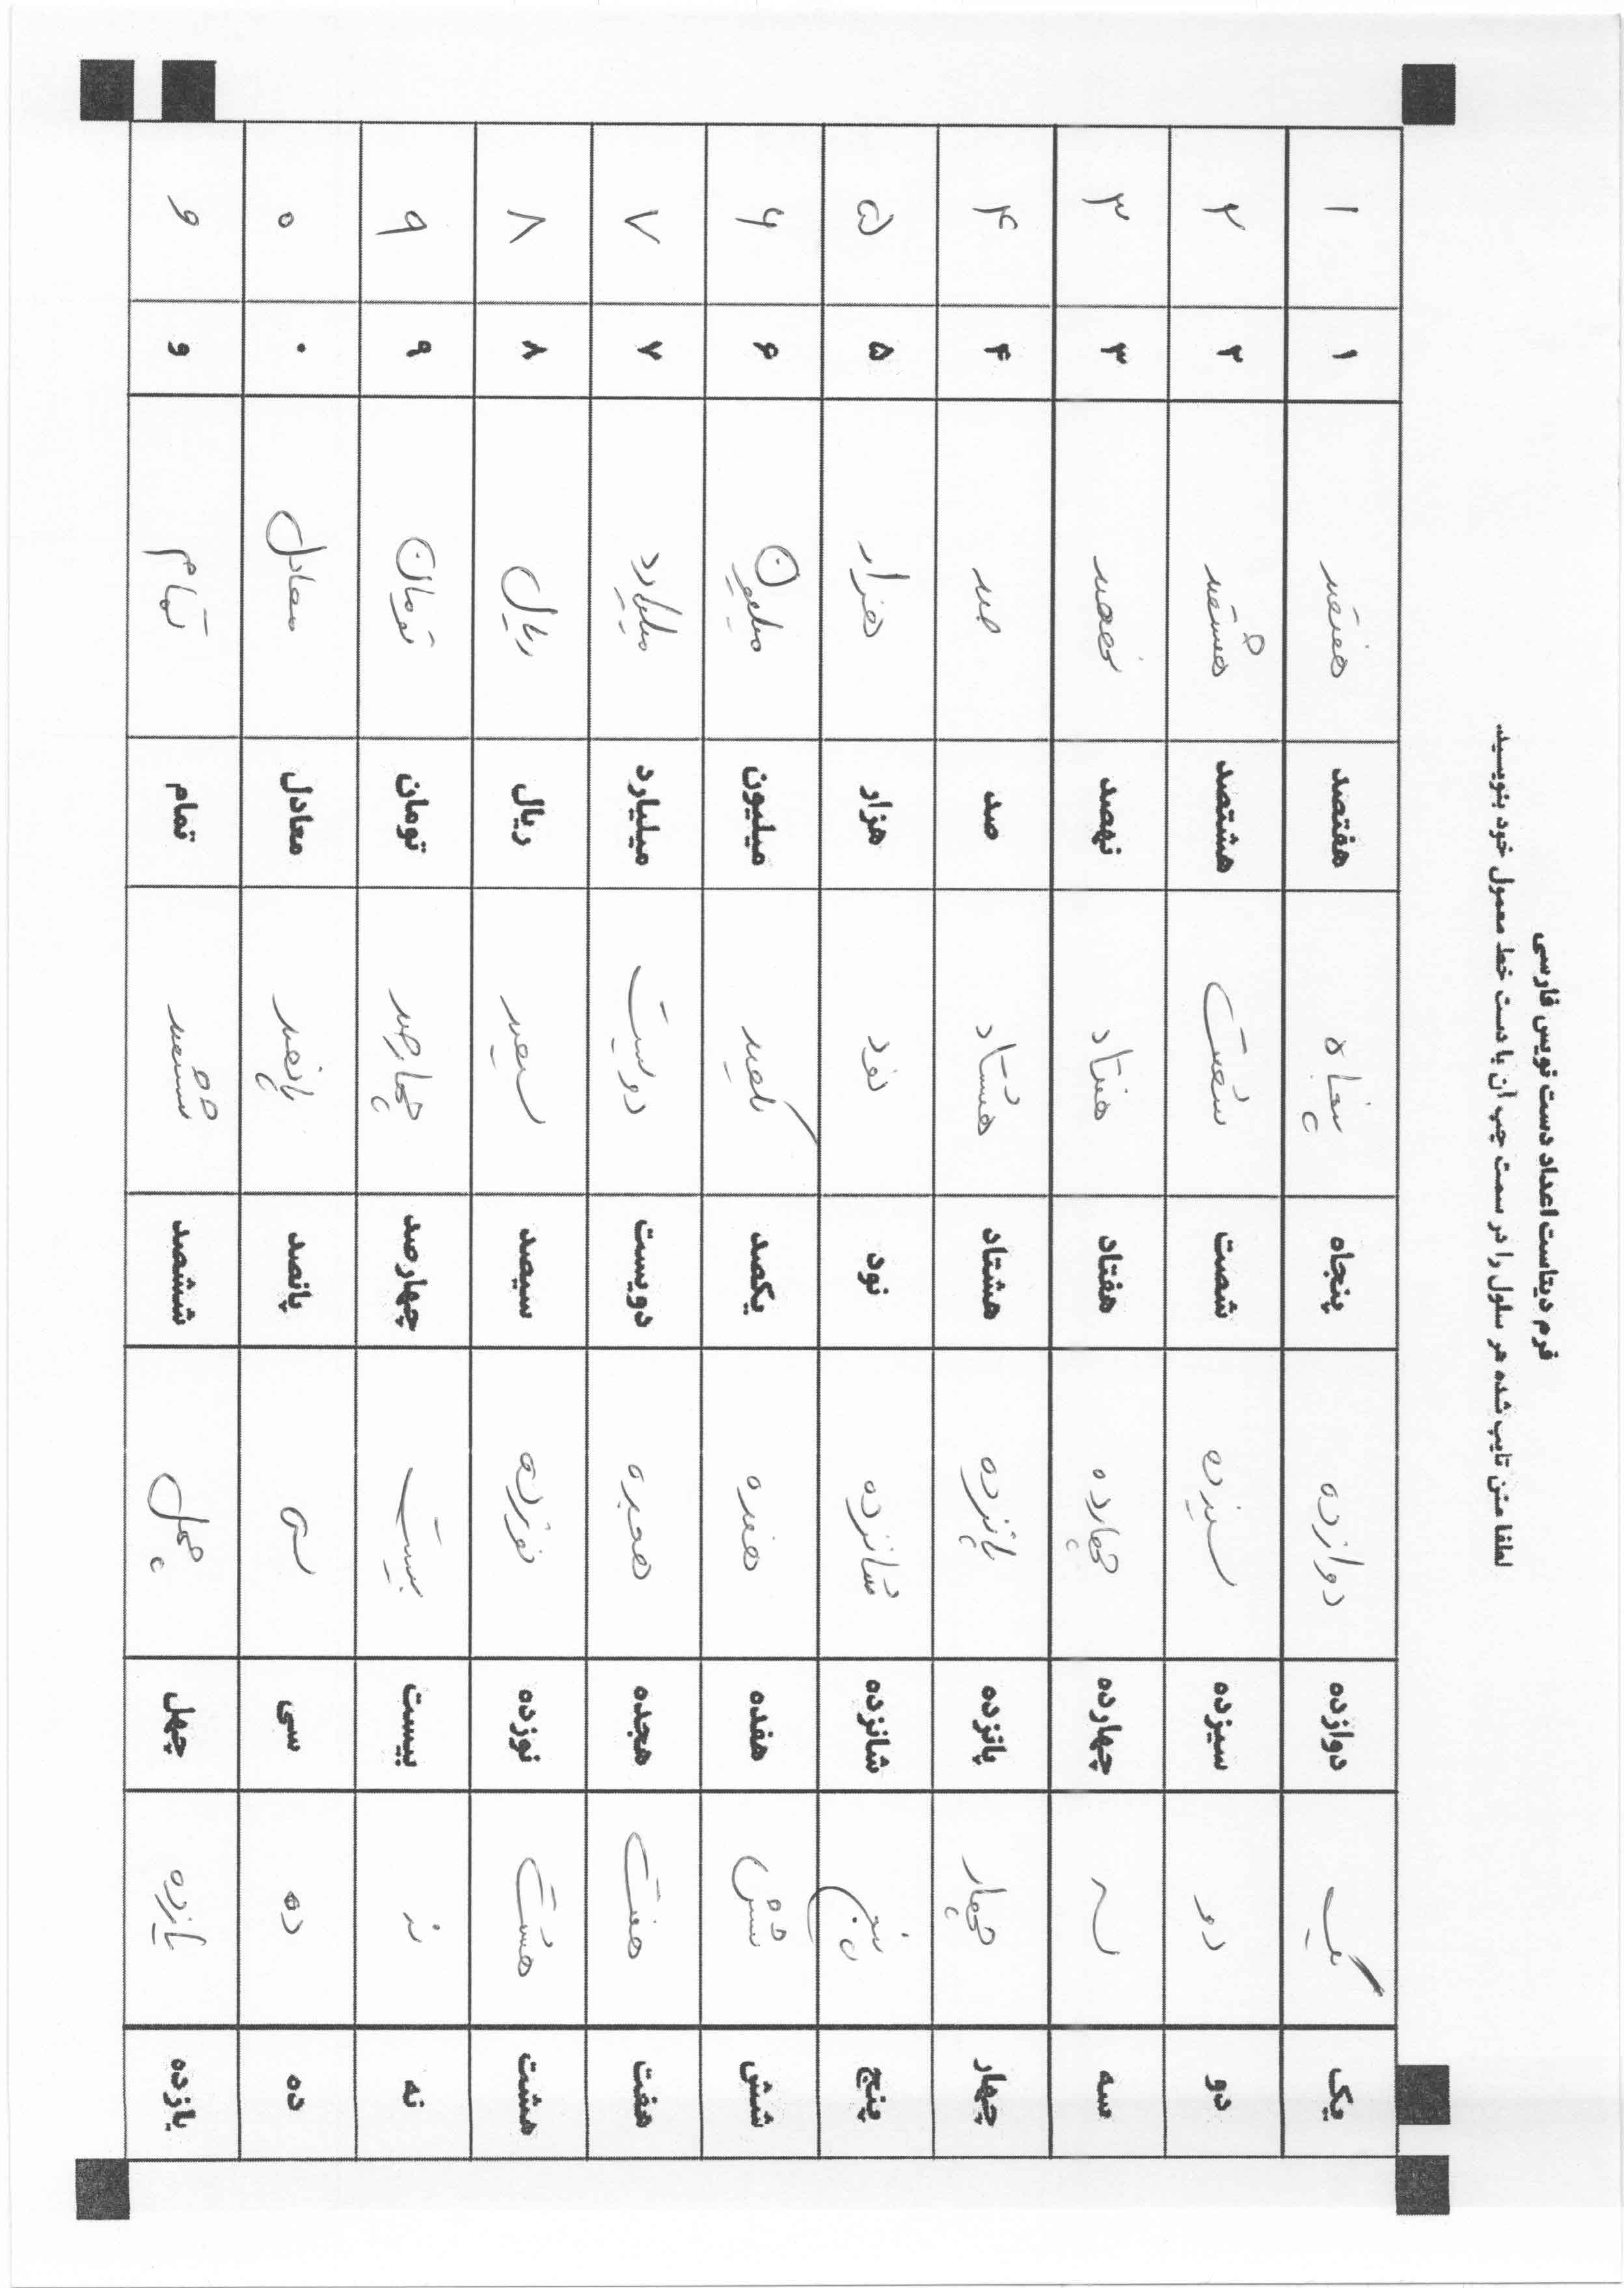

In [ ]:
img = cv2.imread("1.jpg", 0)
cv2_imshow(img)

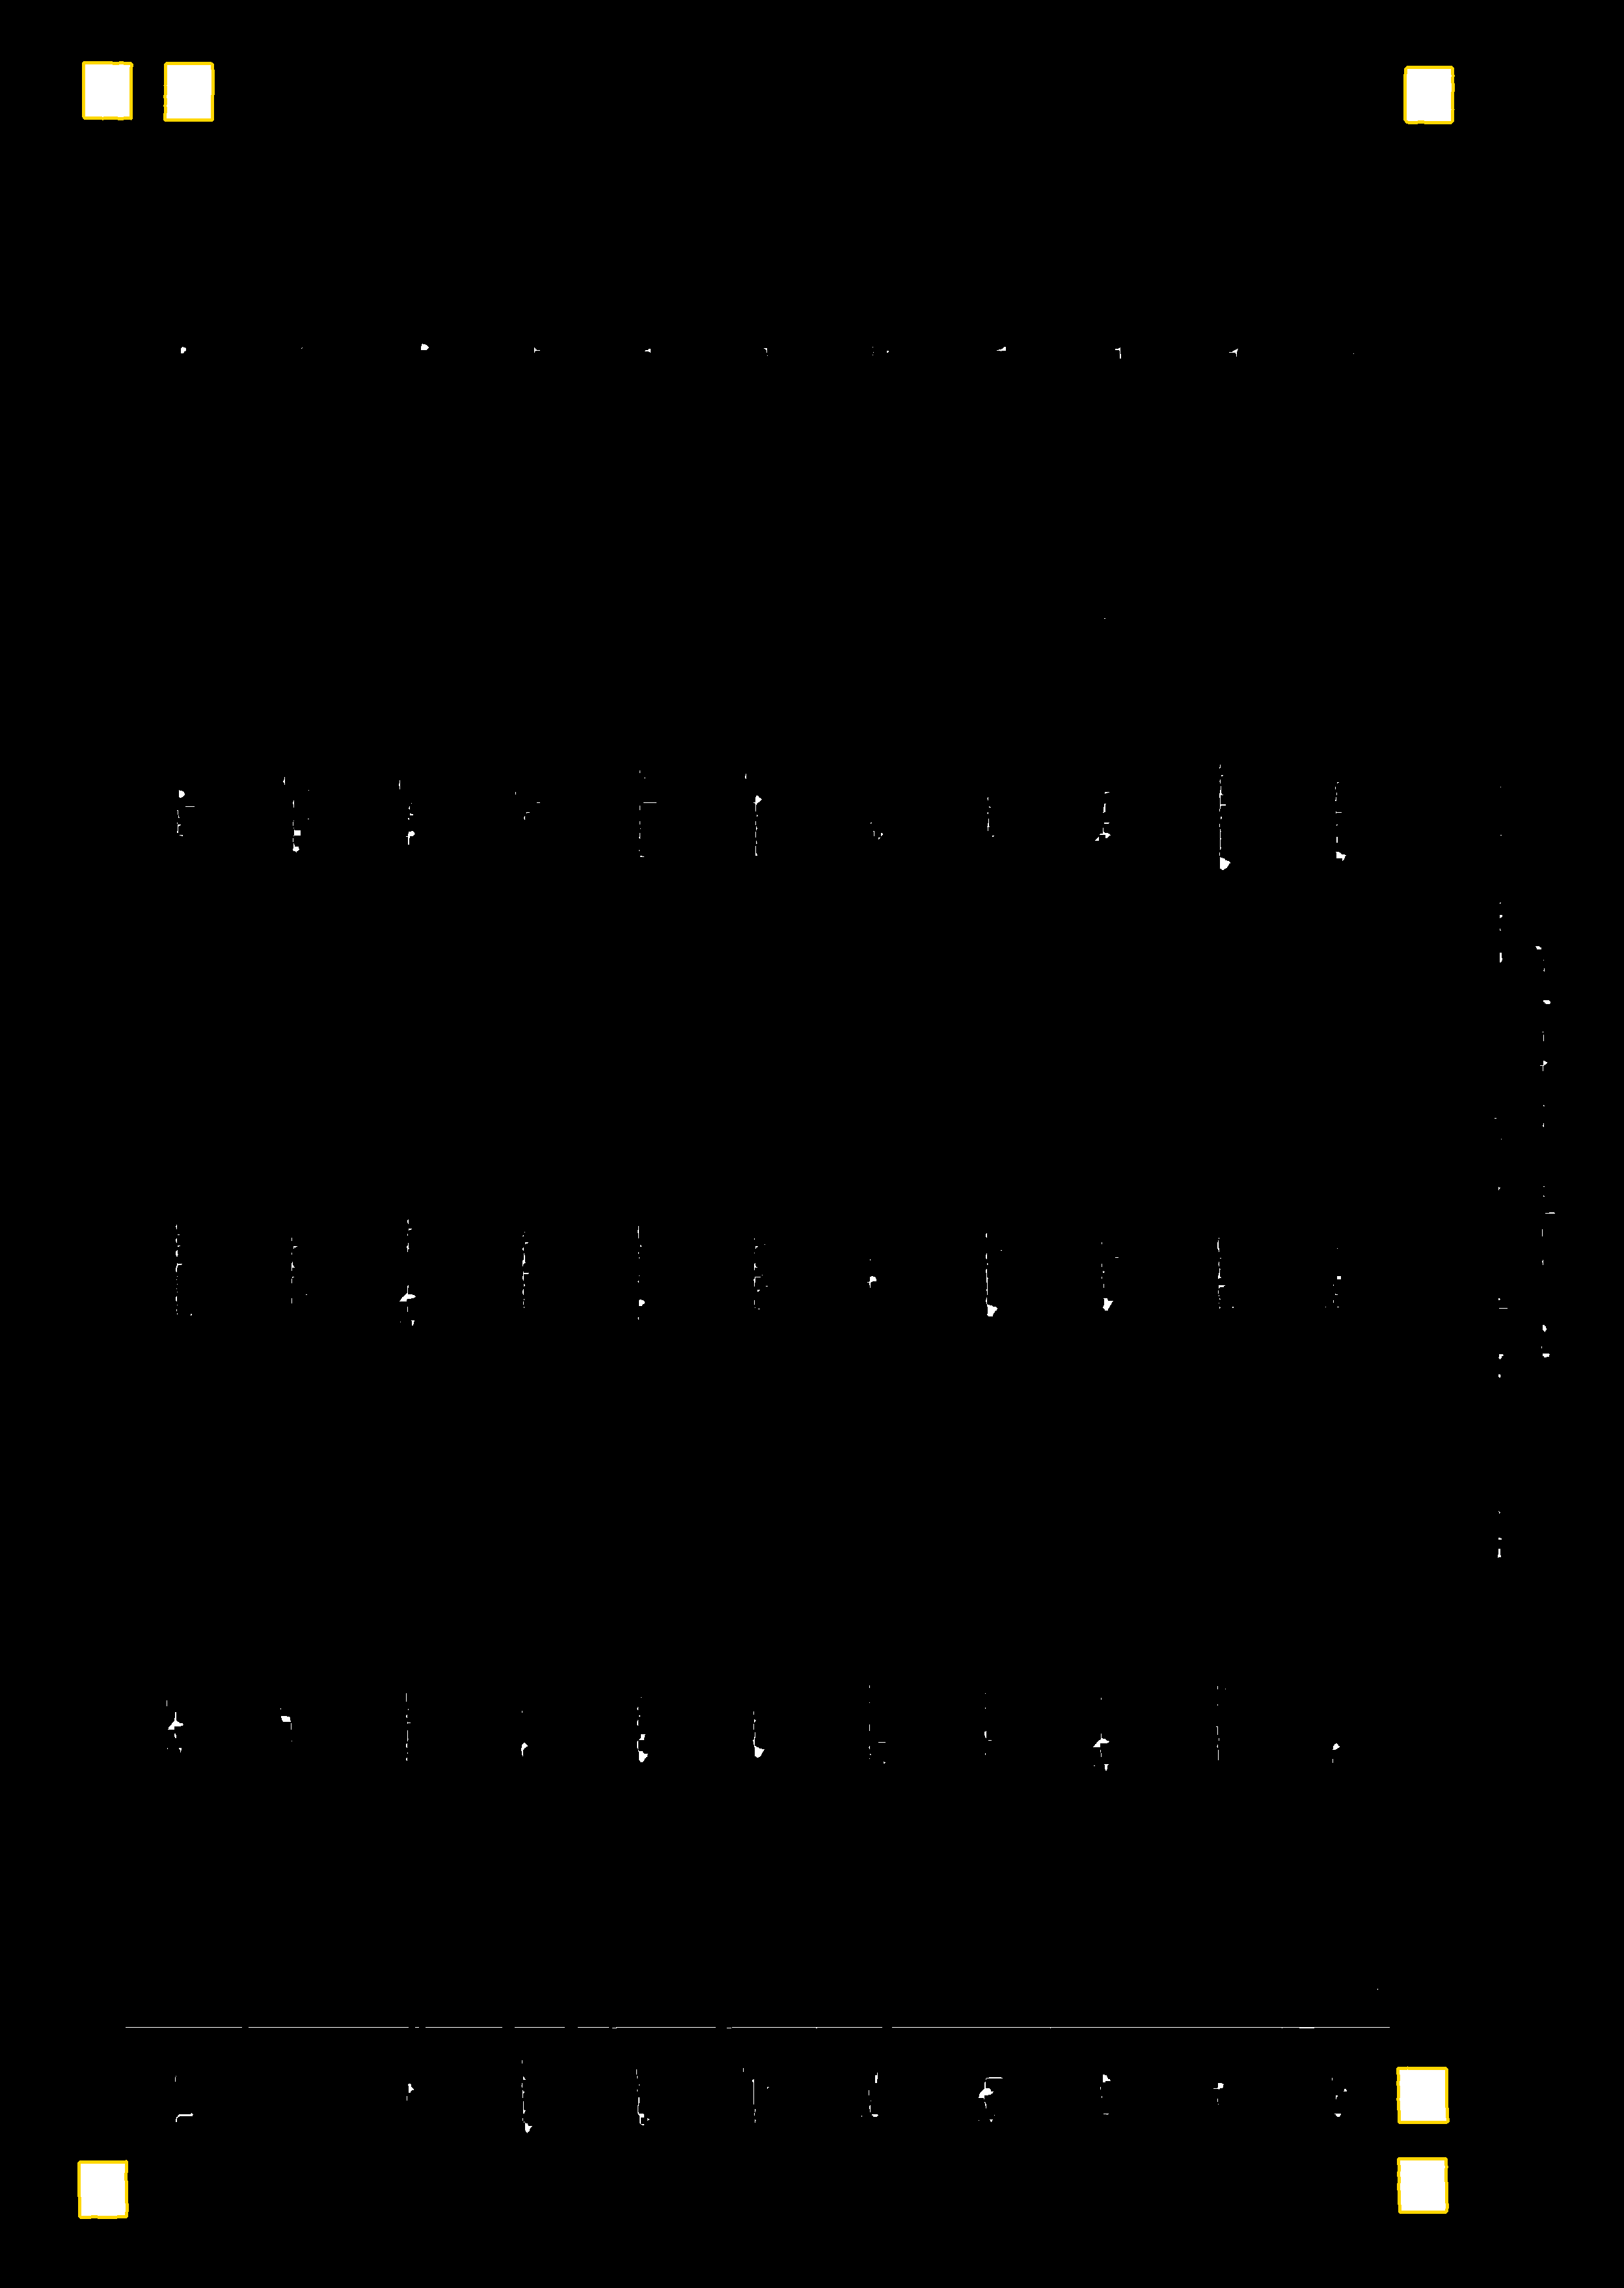

In [ ]:
img_org = cv2.imread("1.jpg")
img = cv2.imread("1.jpg", 0)
thresh, img = cv2.threshold(img, 210, 255, cv2.THRESH_BINARY_INV)

kernel = np.ones((10, 10), np.uint8)
img = cv2.erode(img, kernel)

contours, h = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
preview_img = np.expand_dims(img, axis=-1).repeat(3, axis=-1)
# cv2.drawContours(preview_img, contours, -1,(0,255,0),3)

paper_eyes = []

for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    # print(x, y, w, h)
    if w > 30 and h > 30:
        cv2.drawContours(preview_img, [cnt], 0, (0, 215, 255), 3)
        paper_eyes.append((x, y, w, h))


cv2_imshow(preview_img)

In [ ]:
paper_eyes = np.array(paper_eyes)

In [ ]:
def dist(a):
    return np.sqrt(a[:, 0] ** 2 + a[:, 1] ** 2)


dist(paper_eyes).argmin()

5

In [ ]:
height, width = img.shape
topleft_mask = np.logical_and(
    paper_eyes[:, 0] < width // 2, paper_eyes[:, 1] < height // 2
)
topright_mask = np.logical_and(
    paper_eyes[:, 0] > width // 2, paper_eyes[:, 1] < height // 2
)
bottomright_mask = np.logical_and(
    paper_eyes[:, 0] > width // 2, paper_eyes[:, 1] > height // 2
)
bottomleft_mask = np.logical_and(
    paper_eyes[:, 0] < width // 2, paper_eyes[:, 1] > height // 2
)

In [ ]:
print(topleft_mask)
print(topright_mask)
print(bottomright_mask)
print(bottomleft_mask)

[False False False False  True  True]
[False False False  True False False]
[False  True  True False False False]
[ True False False False False False]


In [ ]:
print(paper_eyes[topleft_mask][paper_eyes[topleft_mask][:, 0].argmin()].ravel())
print(paper_eyes[topright_mask].ravel())
print(paper_eyes[bottomright_mask][paper_eyes[bottomright_mask][:, 1].argmax()].ravel())
print(paper_eyes[bottomleft_mask].ravel())

[128  96  75  87]
[2159  103   75   86]
[2149 3317   76   83]
[ 121 3321   75   87]


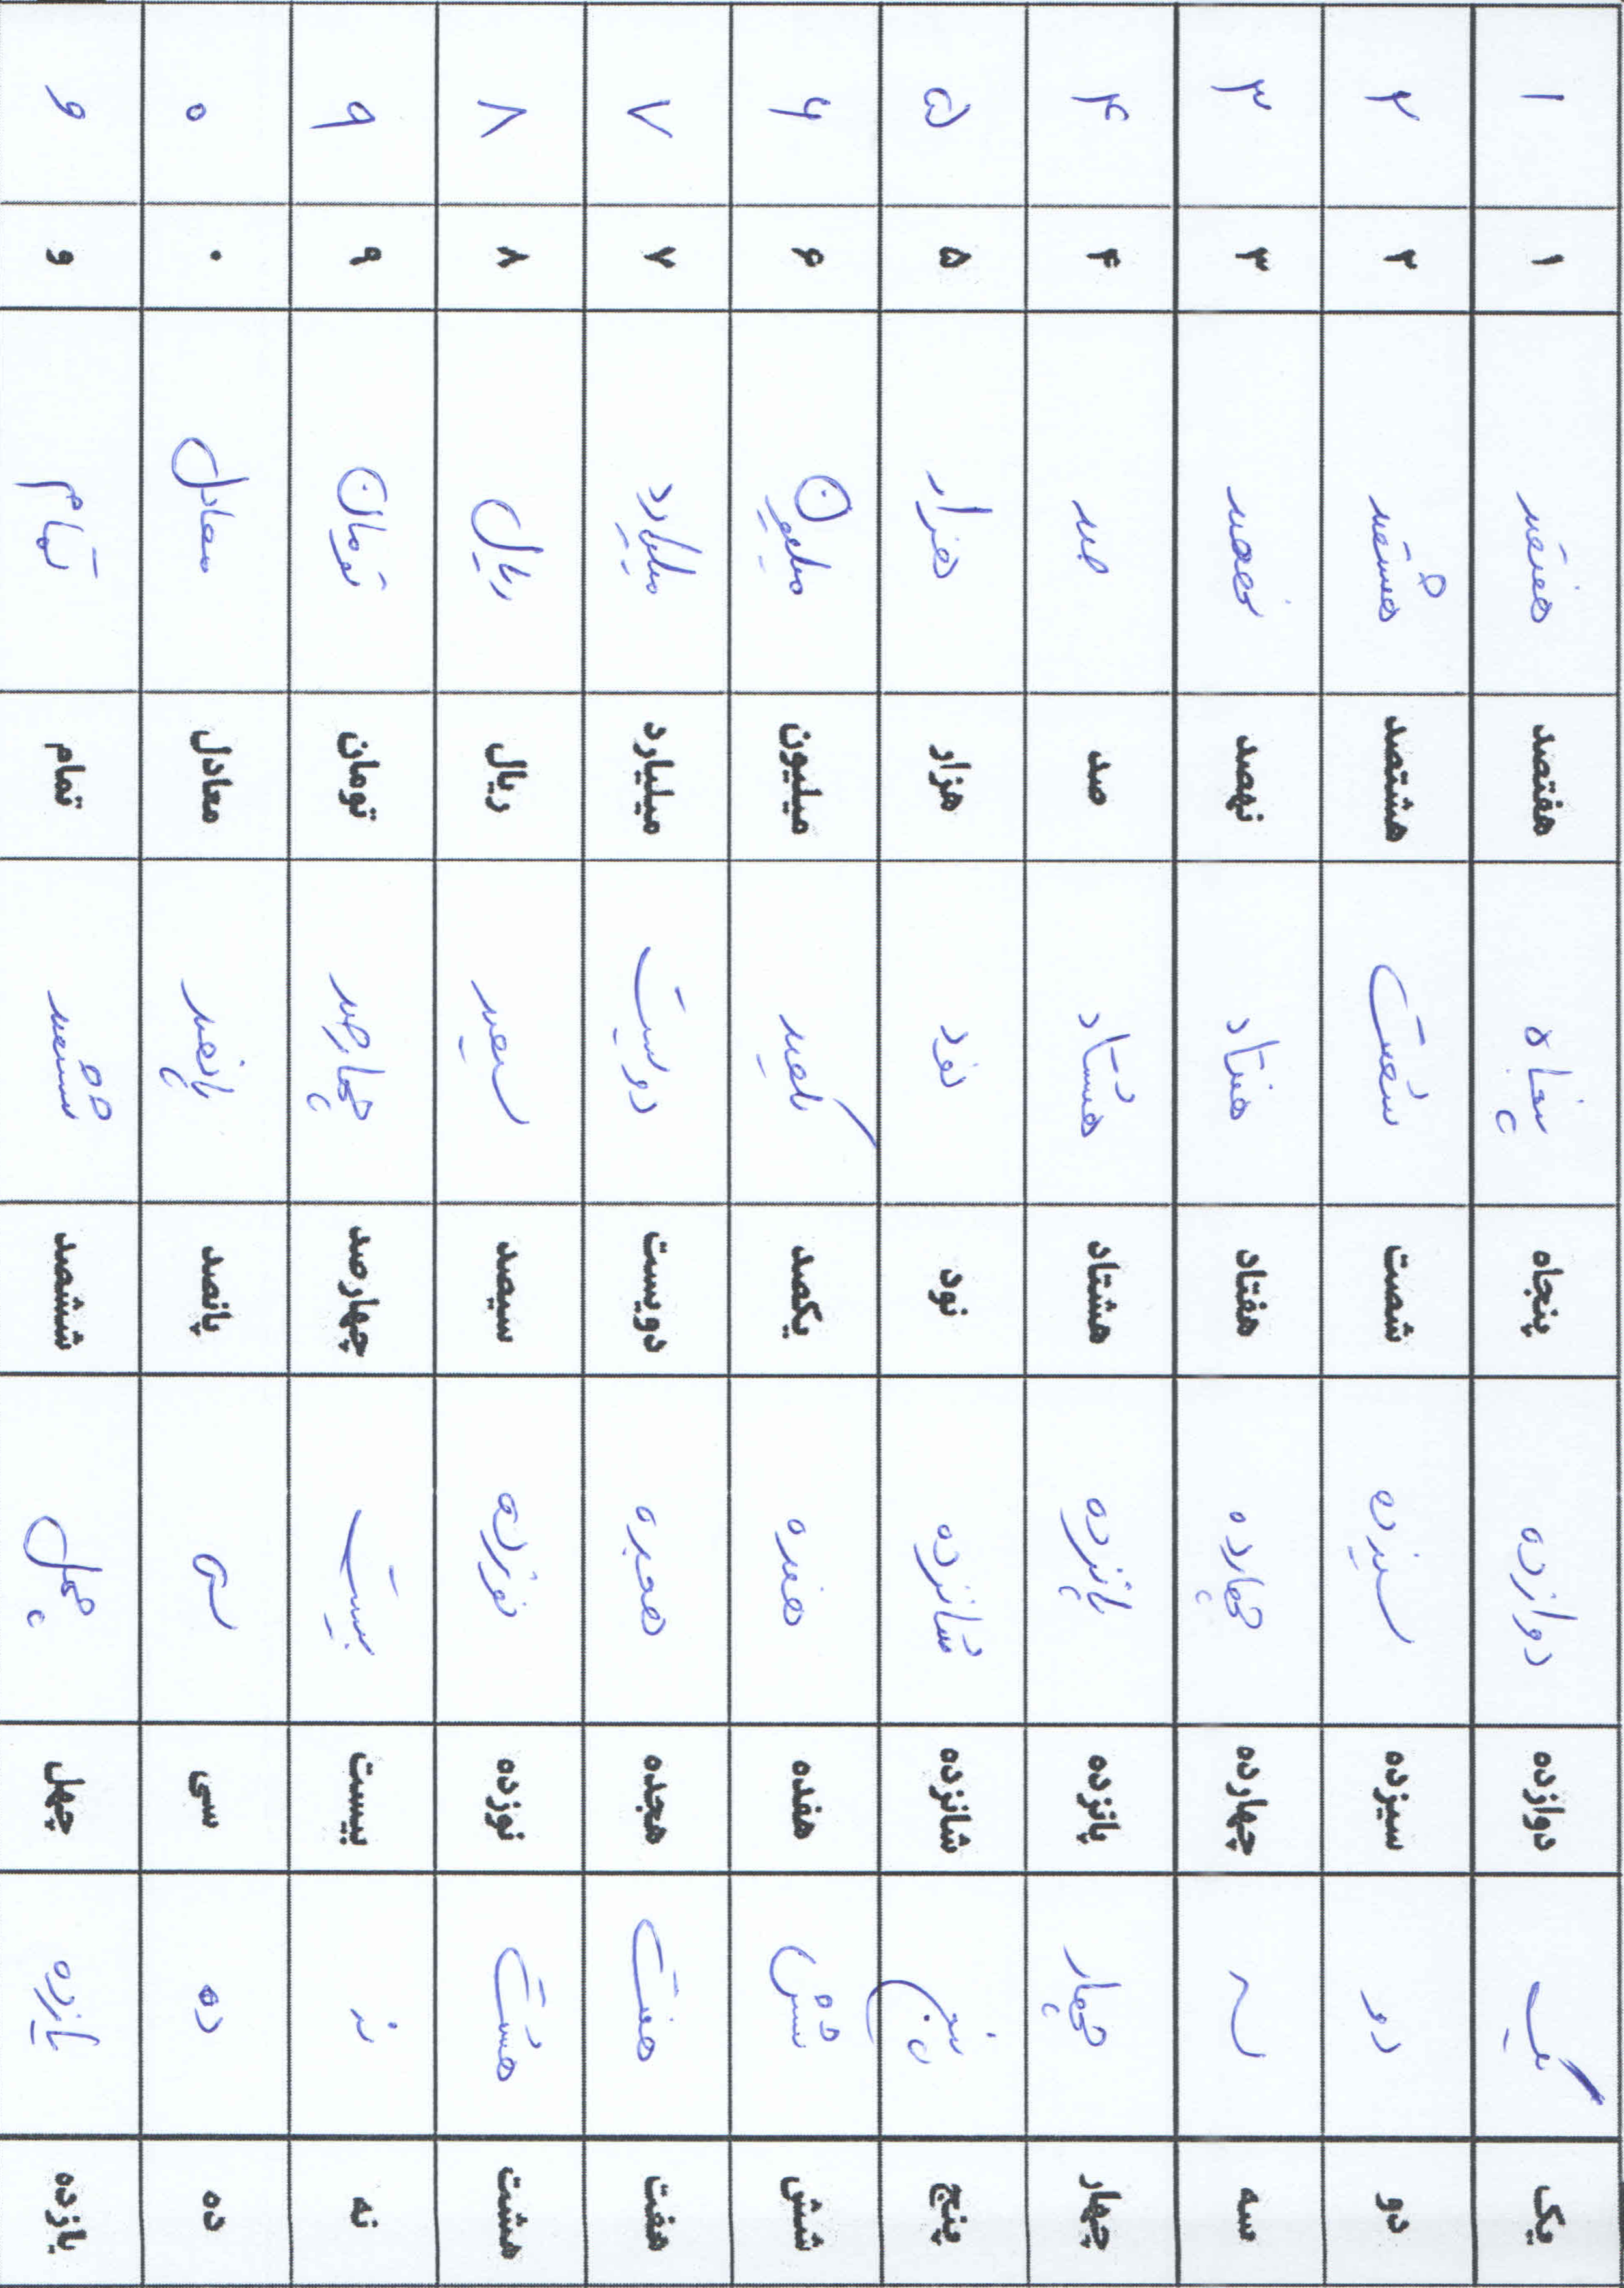

In [ ]:
input_all = np.float32(
    [
        paper_eyes[topleft_mask][paper_eyes[topleft_mask][:, 0].argmin()].ravel(),
        paper_eyes[topright_mask].ravel(),
        paper_eyes[bottomright_mask][
            paper_eyes[bottomright_mask][:, 1].argmax()
        ].ravel(),
        paper_eyes[bottomleft_mask].ravel(),
    ]
)
input_ = np.float32(
    [
        paper_eyes[topleft_mask][paper_eyes[topleft_mask][:, 0].argmin()].ravel()[:2],
        paper_eyes[topright_mask].ravel()[:2],
        paper_eyes[bottomright_mask][
            paper_eyes[bottomright_mask][:, 1].argmax()
        ].ravel()[:2],
        paper_eyes[bottomleft_mask].ravel()[:2],
    ]
)
input_[0][0] += input_all[0][2]
input_[0][1] += input_all[0][3]
input_[1][1] += input_all[1][3]
input_[3][0] += input_all[3][2]
output_ = np.float32([[0, 0], [width - 1, 0], [width - 1, height - 1], [0, height - 1]])


transform_matrix = cv2.getPerspectiveTransform(input_, output_)
preview_img = cv2.warpPerspective(
    img_org,
    transform_matrix,
    (width, height),
    cv2.INTER_LINEAR,
    borderMode=cv2.BORDER_CONSTANT,
    borderValue=(0, 0, 0),
)
cv2_imshow(preview_img)

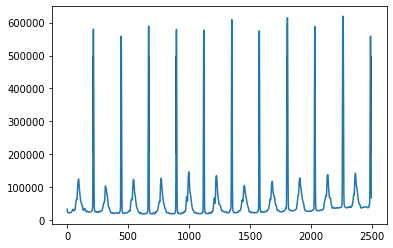

In [ ]:
plt.plot(cv2.bitwise_not(cv2.cvtColor(preview_img, cv2.COLOR_BGR2GRAY)).sum(axis=0))
peaks = find_peaks(
    cv2.bitwise_not(cv2.cvtColor(preview_img, cv2.COLOR_BGR2GRAY)).sum(axis=0),
    height=200000,
)[0]
for p in peaks:
    plt.vlines(p, 200000, 500000)

In [ ]:
# from scipy.signal import find_peaks
# vpeaks = find_peaks(cv2.bitwise_not(cv2.cvtColor(preview_img, cv2.COLOR_BGR2GRAY)).sum(axis=0), height=200000)[0]
# print(len(vpeaks))

# width, height, _ = preview_img.shape

# vpeaks = [0] + sorted(vpeaks) + [width]
# for idx in np.arange(len(vpeaks)):

#   hpeaks = find_peaks(cv2.bitwise_not(cv2.cvtColor(preview_img[:, vpeaks[idx]:vpeaks[idx+1]], cv2.COLOR_BGR2GRAY)).sum(axis=1).ravel(), height=20000)[0]

#   plt.plot(cv2.bitwise_not(cv2.cvtColor(preview_img[:, vpeaks[idx]:vpeaks[idx+1]], cv2.COLOR_BGR2GRAY)).sum(axis=1).ravel())

#   for p in hpeaks:
#     plt.vlines(p, 500, 20002)

#   # cv2_imshow(preview_img[:, peaks[idx]:peaks[idx+1]])
#   break

In [ ]:
blue_range = np.array([[128, 255, 255], [90, 50, 70]])

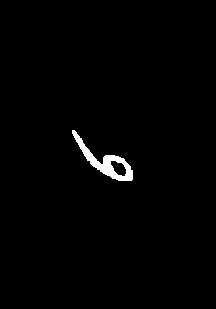

In [ ]:
vpeaks = find_peaks(
    cv2.bitwise_not(cv2.cvtColor(preview_img, cv2.COLOR_BGR2GRAY)).sum(axis=0),
    height=200000,
)[0]

width, height, _ = preview_img.shape

vpeaks = [0] + sorted(vpeaks) + [width]
for vidx in np.arange(len(vpeaks)):

    hpeaks = find_peaks(
        cv2.bitwise_not(
            cv2.cvtColor(
                preview_img[:, vpeaks[vidx] : vpeaks[vidx + 1]], cv2.COLOR_BGR2GRAY
            )
        )
        .sum(axis=1)
        .ravel(),
        height=20000,
    )[0]
    hpeaks = [0] + sorted(hpeaks) + [height]

    for hidx in np.arange(len(hpeaks)):
        if hidx < len(hpeaks) - 1 and hpeaks[hidx + 1] - hpeaks[hidx] > 50:
            part_img = preview_img[
                hpeaks[hidx] : hpeaks[hidx + 1], vpeaks[vidx] : vpeaks[vidx + 1]
            ]
            # cv2_imshow(part_img)

            # Solution 1
            hsv = cv2.cvtColor(part_img, cv2.COLOR_BGR2HSV)
            bluepenMask = cv2.inRange(hsv, blue_range[1], blue_range[0])
            morphKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
            # Perform closing:
            opIterations = 2
            bluepenMask = cv2.morphologyEx(
                bluepenMask,
                cv2.MORPH_OPEN,
                morphKernel,
                None,
                None,
                opIterations,
                cv2.BORDER_REFLECT101,
            )
            # bluepenMask = cv2.morphologyEx(bluepenMask, cv2.MORPH_CLOSE, morphKernel, None, None, opIterations, cv2.BORDER_REFLECT101)

            part_img = cv2.bitwise_and(part_img, part_img, mask=bluepenMask)
            part_img = cv2.cvtColor(part_img, cv2.COLOR_BGR2GRAY)
            th, threshed = cv2.threshold(part_img, 10, 255, cv2.THRESH_BINARY)
            cv2_imshow(threshed)

            # Solution 2
            # hsv = cv2.cvtColor(part_img, cv2.COLOR_BGR2HSV)
            # h,s,v = cv2.split(hsv)
            # th, threshed = cv2.threshold(s, 100, 255, cv2.THRESH_OTSU|cv2.THRESH_BINARY)
            # cv2_imshow(threshed)

            break

    break